In [54]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

In [76]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"

In [6]:
def get_array_from_images(need ):
    dir = "/kaggle/input/hindi-character-recognition/DevanagariHandwrittenCharacterDataset"
    data = []
    labels = []
    
    path = os.path.join(dir, need)

    for files in os.listdir(path):
        each_words_dir = os.path.join(path,files)
        for img in os.listdir(each_words_dir):
            img_path = os.path.join(each_words_dir, img)
            img_array = cv.imread(img_path)
            data.append(img_array)
            labels.append(files)


    return (np.array(data), np.array(labels))        
    

In [176]:
X_train, y_train = get_array_from_images('Train' )

In [177]:
X_train = X_train/255

In [178]:
X_test, y_test = get_array_from_images("Test")

In [179]:
X_test = X_test/255

In [180]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(96, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [181]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 96)                  │          49,248 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,440 (818.12 KB)

 Trainable params: 208,992 (816.38 KB)

 Non-trainable params: 448 (1.75 KB)

In [182]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [185]:
epochs = 10

In [186]:
y_train[:10]

array(['character_28_la', 'character_28_la', 'character_28_la',
       'character_28_la', 'character_28_la', 'character_28_la',
       'character_28_la', 'character_28_la', 'character_28_la',
       'character_28_la'], dtype='<U25')

In [187]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [188]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 33)

In [189]:
history = model.fit(X_train, y_train,batch_size = 32, epochs = epochs, validation_data = (X_val, y_val))

Epoch 1/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6760 - loss: 2.0300 - val_accuracy: 0.9510 - val_loss: 0.3750
Epoch 2/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9423 - loss: 0.3964 - val_accuracy: 0.9567 - val_loss: 0.3281
Epoch 3/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9563 - loss: 0.3209 - val_accuracy: 0.9664 - val_loss: 0.2749
Epoch 4/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9637 - loss: 0.2823 - val_accuracy: 0.9634 - val_loss: 0.2766
Epoch 5/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9640 - loss: 0.2749 - val_accuracy: 0.9754 - val_loss: 0.2433
Epoch 6/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9698 - loss: 0.2526 - val_accuracy: 0.9608 - val_loss: 0.3070
Epoch 7/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9700 - loss: 0.2644 - val_accuracy: 0.9711 - val_loss: 0.2704
Epoch 8/10
1955/1955 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.2373 -

In [190]:
y_test = le.fit_transform(y_test)

In [191]:

combined = list(zip(X_test, y_test))

np.random.shuffle(combined)

X_test, y_test = zip(*combined)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [192]:
y_pred = model.predict(X_test)

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [193]:
y_pred = np.argmax(y_pred, axis = 1)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       0.96      0.97      0.97       300
           2       0.99      0.97      0.98       300
           3       0.98      0.97      0.97       300
           4       0.98      0.97      0.97       300
           5       1.00      1.00      1.00       300
           6       0.96      0.99      0.97       300
           7       0.99      0.95      0.97       300
           8       0.96      0.90      0.93       300
           9       0.98      0.95      0.96       300
          10       1.00      0.96      0.98       300
          11       0.98      0.98      0.98       300
          12       0.98      0.99      0.99       300
          13       0.96      1.00      0.98       300
          14       0.96      0.94      0.95       300
          15       0.97      0.95      0.96       300
          16       0.97      0.99      0.98       300
          17       0.95    

In [195]:
accuracy_score(y_test, y_pred)

0.9769565217391304

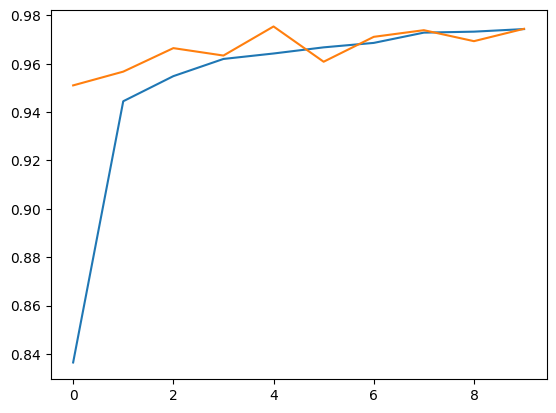

In [198]:
plt.plot(range(0, epochs), history.history['accuracy'])
plt.plot(range(0, epochs), history.history['val_accuracy'])

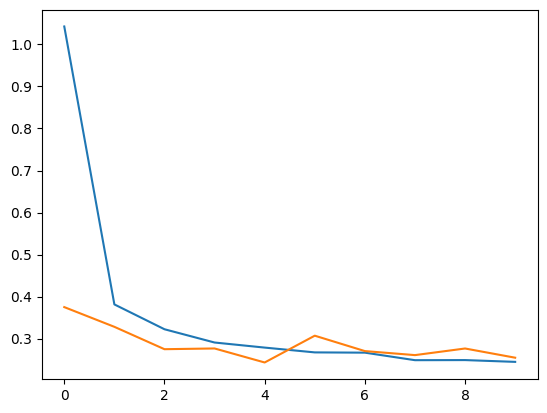

In [199]:
plt.plot(range(0, epochs), history.history['loss'])
plt.plot(range(0, epochs), history.history['val_loss'])

In [238]:
img1 = cv.imread('/kaggle/input/newone/Drawing-5.sketchpad.png')
img1 = img1/255

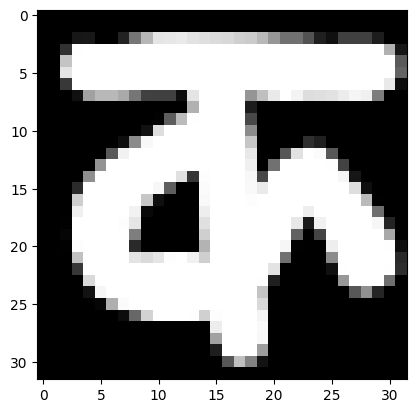

In [239]:
plt.imshow(img1)

In [240]:
img1 = np.expand_dims(img1, axis = 0)
predicted = model.predict(img1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [241]:
p = np.argmax(predicted, axis = 1)

In [242]:
le.inverse_transform(p)

array(['character_1_ka'], dtype='<U25')

In [237]:
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

character_10_yna -> 0
character_11_taamatar -> 1
character_12_thaa -> 2
character_13_daa -> 3
character_14_dhaa -> 4
character_15_adna -> 5
character_16_tabala -> 6
character_17_tha -> 7
character_18_da -> 8
character_19_dha -> 9
character_1_ka -> 10
character_20_na -> 11
character_21_pa -> 12
character_22_pha -> 13
character_23_ba -> 14
character_24_bha -> 15
character_25_ma -> 16
character_26_yaw -> 17
character_27_ra -> 18
character_28_la -> 19
character_29_waw -> 20
character_2_kha -> 21
character_30_motosaw -> 22
character_31_petchiryakha -> 23
character_32_patalosaw -> 24
character_33_ha -> 25
character_34_chhya -> 26
character_35_tra -> 27
character_36_gya -> 28
character_3_ga -> 29
character_4_gha -> 30
character_5_kna -> 31
character_6_cha -> 32
character_7_chha -> 33
character_8_ja -> 34
character_9_jha -> 35
digit_0 -> 36
digit_1 -> 37
digit_2 -> 38
digit_3 -> 39
digit_4 -> 40
digit_5 -> 41
digit_6 -> 42
digit_7 -> 43
digit_8 -> 44
digit_9 -> 45


In [243]:
def predict_characters(path, model, encoder):
    img = cv.imread(path)
    img = cv.resize(img, (32,32))
    img_n = img/255
    img_batch = np.expand_dims(img_n, axis = 0)
    y_predict = model.predict(img_batch)
    y_predict = np.argmax(y_predict, axis = 1)
    character = encoder.inverse_transform(y_predict)
    plt.imshow(img)
    return character
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array(['digit_0'], dtype='<U25')

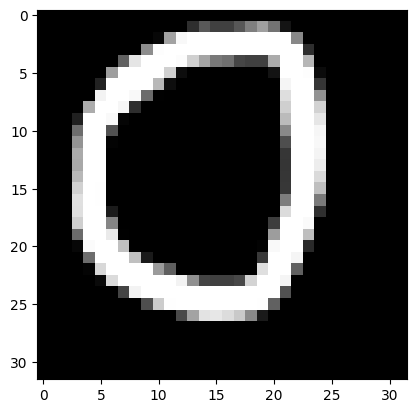

In [245]:
predict_characters('/kaggle/input/newone/Drawing-3.sketchpad.png', model, le)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array(['character_11_taamatar'], dtype='<U25')

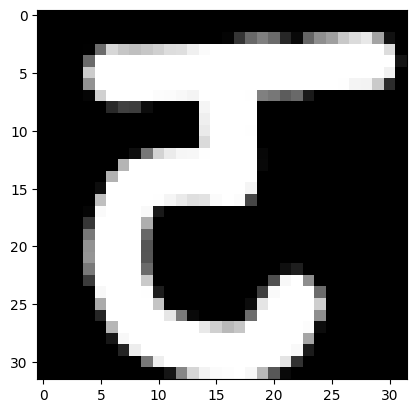

In [247]:
predict_characters('/kaggle/input/newone/Drawing-4.sketchpad.png', model, le)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array(['character_1_ka'], dtype='<U25')

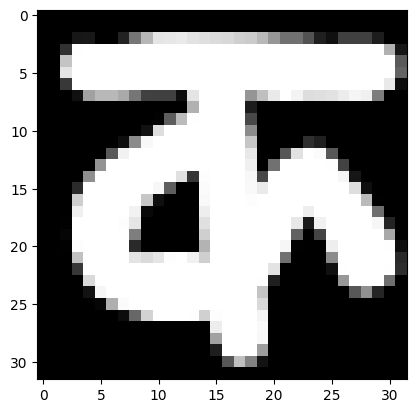

In [248]:
predict_characters('/kaggle/input/newone/Drawing-5.sketchpad.png', model, le)